In [3]:
#configurando o diretorio
import os
os.chdir("/Users/laura.nonato/Downloads/cursos/archive")

In [4]:
#carregando as bibliotecas
import pandas as pd

CARREGAMENTO DOS DADOS

In [5]:
#informações gerais sobre os pedidos
orders = pd.read_csv('olist_orders_dataset.csv')

In [6]:
#informações sobre avaliações dos pedidos
avaliacoes = pd.read_csv('olist_order_reviews_dataset.csv') 

In [7]:
#informações sobre os clientes 
clientes = pd.read_csv('olist_customers_dataset.csv')

In [8]:
#informações sobre os itens dos pedidos  
itens_pedidos = pd.read_csv('olist_order_items_dataset.csv')

In [9]:
#informações sobre os produtos
produtos = pd.read_csv('olist_products_dataset.csv')

In [10]:
#informações sobre os vendedores
vendedores = pd.read_csv('olist_sellers_dataset.csv')

In [11]:
#informações sobre pagamentos dos pedidos  
pagamentos = pd.read_csv('olist_order_payments_dataset.csv')

In [12]:
#tradução dos produtos para o portugues
traducao = pd.read_csv('product_category_name_translation.csv')

ENTENDENDO OS DADOS CARREGADOS

In [13]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [14]:
#nome das colunas 
list(orders.columns.values)

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date']

In [15]:
#tipos de dados
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [16]:
#listando os possiveis valores missings na tabela orders
orders.apply(lambda x: sum(x.isnull()),axis=0)

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [17]:
avaliacoes.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [18]:
pagamentos.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


PREPARACAO DO DATASET DA ANALISE: MERGE

Merge de todos os datasets referentes ao **consumidor**

In [19]:
consumidor = pd.merge(orders, avaliacoes, on='order_id')
consumidor = pd.merge(consumidor, pagamentos,on='order_id')
consumidor = pd.merge(consumidor, clientes,on='customer_id')
consumidor.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,...,2018-08-08 00:00:00,2018-08-08 18:37:50,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,...,2018-08-18 00:00:00,2018-08-22 19:07:58,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


Merge de todos os datasets referentes ao **vendedor**

In [20]:
itens_pedidos.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [21]:
produtos.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [22]:
vendedores.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [23]:
vendedor_produto  = pd.merge(itens_pedidos,produtos,on='product_id') #join de items pedidos e produtos por id do produto 
vendedor_produto  = pd.merge(vendedor_produto,vendedores,on='seller_id') #join dos produtos pedidos com a tabela de vendedores por seller_id
vendedor_produto  = pd.merge(vendedor_produto,traducao,on='product_category_name')
vendedor_produto .head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff


Merge dos datasets do **consumidor e do vendedor**

In [24]:
df_ecommerce = pd.merge(consumidor, vendedor_produto, on = 'order_id')
df_ecommerce.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,...,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,...,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP,auto


SELEÇÃO DOS DADOS DO DATASET
restringindo o dataset para as colunas que realmente irei trabalhar a analise

In [25]:
df_ecommerce = (df_ecommerce.loc[:,['order_status','order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date','shipping_limit_date'
,'payment_sequential','payment_type','payment_installments','payment_value','price'
,'freight_value','product_category_name','product_name_lenght','product_description_lenght','product_photos_qty','review_score']])

In [26]:
df_ecommerce = df_ecommerce.rename(columns={'product_name_lenght': 'product_name_length', 'product_description_lenght': 'product_description_length',
                                            'product_category_name_english': 'product_category'})

In [27]:
df_ecommerce.head()

,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_category_name,product_name_length,product_description_length,product_photos_qty,review_score
0,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,1,credit_card,1,18.12,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,4
1,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,3,voucher,1,2.00,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,4
2,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,2,voucher,1,18.59,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,4
3,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-30 03:24:27,1,boleto,1,141.46,118.70,22.76,perfumaria,29.0,178.0,1.0,4
4,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-13 08:55:23,1,credit_card,3,179.12,159.90,19.22,automotivo,46.0,232.0,1.0,5


In [28]:
#tamanho do dataset final
df_ecommerce.shape

(115609, 16)

limpeza e pré processamento do dataset

In [29]:
#verifico os valores nulos em toda tabela 
df_ecommerce.isnull().sum()

order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2400
order_estimated_delivery_date       0
shipping_limit_date                 0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
price                               0
freight_value                       0
product_category_name               0
product_name_length                 0
product_description_length          0
product_photos_qty                  0
review_score                        0
dtype: int64

In [30]:
#removo os valores nulos
df_ecommerce.dropna(how='any',inplace=True)

In [31]:
#converto o timestamp para date, precisarei apenas do formato de data dos pedidos
cols = ['order_purchase_timestamp', 'order_estimated_delivery_date', 'order_delivered_customer_date', 'shipping_limit_date']
for col in cols:
    df_ecommerce[col] = pd.to_datetime(df_ecommerce[col]).dt.date

In [32]:
df_ecommerce['shipping_limit_date']

0         2017-10-06
1         2017-10-06
2         2017-10-06
3         2018-07-30
4         2018-08-13
             ...    
115604    2018-02-12
115605    2017-09-05
115606    2018-01-12
115607    2018-01-12
115608    2018-03-15
Name: shipping_limit_date, Length: 113209, dtype: object

In [33]:
#em relação a entrega dos pedidos, acrescentarei colunas que serao uteis para analise: 
# qt dias da entrega e qt de dias estimados para entrega
df_ecommerce['delivery_days'] = df_ecommerce['order_delivered_customer_date'] - df_ecommerce['order_purchase_timestamp']
df_ecommerce['estimated_days'] = df_ecommerce['order_estimated_delivery_date'] - df_ecommerce['order_purchase_timestamp']
df_ecommerce['shipping_days'] = df_ecommerce['shipping_limit_date'] - df_ecommerce['order_purchase_timestamp']

In [34]:
df_ecommerce['shipping_days']

0        4 days
1        4 days
2        4 days
3        6 days
4        5 days
          ...  
115604   6 days
115605   9 days
115606   4 days
115607   4 days
115608   7 days
Name: shipping_days, Length: 113209, dtype: timedelta64[ns]

In [35]:
#com o timedelta() converto os campos com qt de dias para o tipo inteiro, foi criado como string
df_ecommerce.astype({
    'delivery_days':'int64'
    ,'estimated_days':'int64'
    ,'shipping_days':'int64'
})

,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_category_name,product_name_length,product_description_length,product_photos_qty,review_score,delivery_days,estimated_days,shipping_days
0,delivered,2017-10-02,2017-10-10,2017-10-18,2017-10-06,1,credit_card,1,18.12,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,4,691200000000000,1382400000000000,345600000000000
1,delivered,2017-10-02,2017-10-10,2017-10-18,2017-10-06,3,voucher,1,2.00,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,4,691200000000000,1382400000000000,345600000000000
2,delivered,2017-10-02,2017-10-10,2017-10-18,2017-10-06,2,voucher,1,18.59,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,4,691200000000000,1382400000000000,345600000000000
3,delivered,2018-07-24,2018-08-07,2018-08-13,2018-07-30,1,boleto,1,141.46,118.70,22.76,perfumaria,29.0,178.0,1.0,4,1209600000000000,1728000000000000,518400000000000
4,delivered,2018-08-08,2018-08-17,2018-09-04,2018-08-13,1,credit_card,3,179.12,159.90,19.22,automotivo,46.0,232.0,1.0,5,777600000000000,2332800000000000,432000000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,delivered,2018-02-06,2018-02-28,2018-03-02,2018-02-12,1,credit_card,3,195.00,174.90,20.10,bebes,52.0,828.0,4.0,4,1900800000000000,2073600000000000,518400000000000
115605,delivered,2017-08-27,2017-09-21,2017-09-27,2017-09-05,1,credit_card,5,271.01,205.99,65.02,eletrodomesticos_2,51.0,500.0,2.0,5,2160000000000000,2678400000000000,777600000000000
115606,delivered,2018-01-08,2018-01-25,2018-02-15,2018-01-12,1,credit_card,4,441.16,179.99,40.59,informatica_acessorios,59.0,1893.0,1.0,2,1468800000000000,3283200000000000,345600000000000
115607,delivered,2018-01-08,2018-01-25,2018-02-15,2018-01-12,1,credit_card,4,441.16,179.99,40.59,informatica_acessorios,59.0,1893.0,1.0,2,1468800000000000,3283200000000000,345600000000000


In [36]:
#seleciono a coluna apenas para confirmar a conversao do tipo de dado
df_ecommerce['delivery_days']

0         8 days
1         8 days
2         8 days
3        14 days
4         9 days
           ...  
115604   22 days
115605   25 days
115606   17 days
115607   17 days
115608    8 days
Name: delivery_days, Length: 113209, dtype: timedelta64[ns]

ENTENDIMENTO RAPIDO DA TABELA FINAL

In [37]:
df_ecommerce.head(3)

,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_category_name,product_name_length,product_description_length,product_photos_qty,review_score,delivery_days,estimated_days,shipping_days
0,delivered,2017-10-02,2017-10-10,2017-10-18,2017-10-06,1,credit_card,1,18.12,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,4,8 days,16 days,4 days
1,delivered,2017-10-02,2017-10-10,2017-10-18,2017-10-06,3,voucher,1,2.00,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,4,8 days,16 days,4 days
2,delivered,2017-10-02,2017-10-10,2017-10-18,2017-10-06,2,voucher,1,18.59,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,4,8 days,16 days,4 days


In [38]:
#quais são os status dos pedidos?
df_ecommerce.order_status.unique()

array(['delivered', 'canceled'], dtype=object)

In [39]:
#quais as categorias distintas dos produtos?
df_ecommerce.product_category_name.unique()

array(['utilidades_domesticas', 'perfumaria', 'automotivo', 'pet_shop',
       'papelaria', 'moveis_decoracao', 'moveis_escritorio',
       'ferramentas_jardim', 'informatica_acessorios', 'cama_mesa_banho',
       'brinquedos', 'telefonia', 'beleza_saude', 'eletronicos', 'bebes',
       'cool_stuff', 'relogios_presentes', 'climatizacao',
       'esporte_lazer', 'livros_interesse_geral',
       'construcao_ferramentas_construcao', 'eletroportateis',
       'alimentos', 'malas_acessorios', 'fashion_underwear_e_moda_praia',
       'fashion_bolsas_e_acessorios', 'instrumentos_musicais',
       'construcao_ferramentas_iluminacao', 'livros_tecnicos',
       'construcao_ferramentas_jardim', 'eletrodomesticos',
       'market_place', 'agro_industria_e_comercio', 'artigos_de_festas',
       'casa_conforto', 'cds_dvds_musicais',
       'industria_comercio_e_negocios', 'consoles_games', 'moveis_quarto',
       'construcao_ferramentas_seguranca', 'telefonia_fixa', 'bebidas',
       'moveis_cozinha

In [40]:
#teste para filtrar da linha 2 a linha 4
df_ecommerce[2:4]

,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_category_name,product_name_length,product_description_length,product_photos_qty,review_score,delivery_days,estimated_days,shipping_days
2,delivered,2017-10-02,2017-10-10,2017-10-18,2017-10-06,2,voucher,1,18.59,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,4,8 days,16 days,4 days
3,delivered,2018-07-24,2018-08-07,2018-08-13,2018-07-30,1,boleto,1,141.46,118.70,22.76,perfumaria,29.0,178.0,1.0,4,14 days,20 days,6 days


In [55]:
#antes de tudo, qual é o periodo que estamos analisando? verifico a data maxima e minima do pedido
df_ecommerce['order_delivered_customer_date'].max()

datetime.date(2018, 10, 17)

In [57]:
df_ecommerce['order_delivered_customer_date'].min()

datetime.date(2016, 10, 11)

estamos analisando pedidos entre 11/10/16 e 17/10/18 

In [41]:
#carregamento das bibliotecas para visualizacao dos dados
import matplotlib.pyplot as plt

In [42]:
import seaborn as sns

<AxesSubplot:xlabel='review_score', ylabel='Count'>

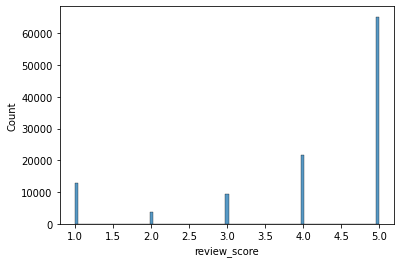

In [43]:
#distribuição das avaliacoes dos pedidos
sns.histplot(x='review_score', data=df_ecommerce)

<AxesSubplot:xlabel='payment_type', ylabel='Count'>

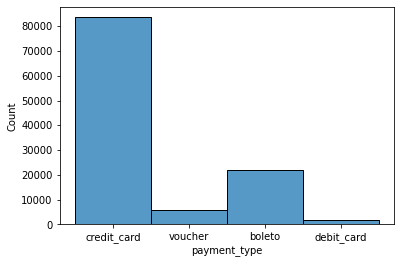

In [44]:
#histograma com a distribuição dos tipos de pagamento
sns.histplot( x='payment_type', data=df_ecommerce)


In [45]:
#os pagamentos sao feitos majoritariamente por cartao de credito, seguindo de boleto
#mas qual é o valor pago por tipo de pagamento?

In [49]:
#funcao para criacao de grafico de barras automatica:
def bar_plot_df(x_var, y_var, title):
  # definição do tamanho das barras, letra, titulo, etc
  fig_size = (18,8)
  font_size = 16
  title_font_size = 20
  #especifica a criação do gráfico de barras
  fig = plt.figure(figsize = fig_size)
  sns.barplot(x = x_var, 
              y = y_var, data=df_ecommerce)
  plt.title(title, fontsize = title_font_size)
  plt.xlabel(x_var, fontsize = font_size)
  plt.ylabel(y_var, fontsize = font_size)
  plt.show()

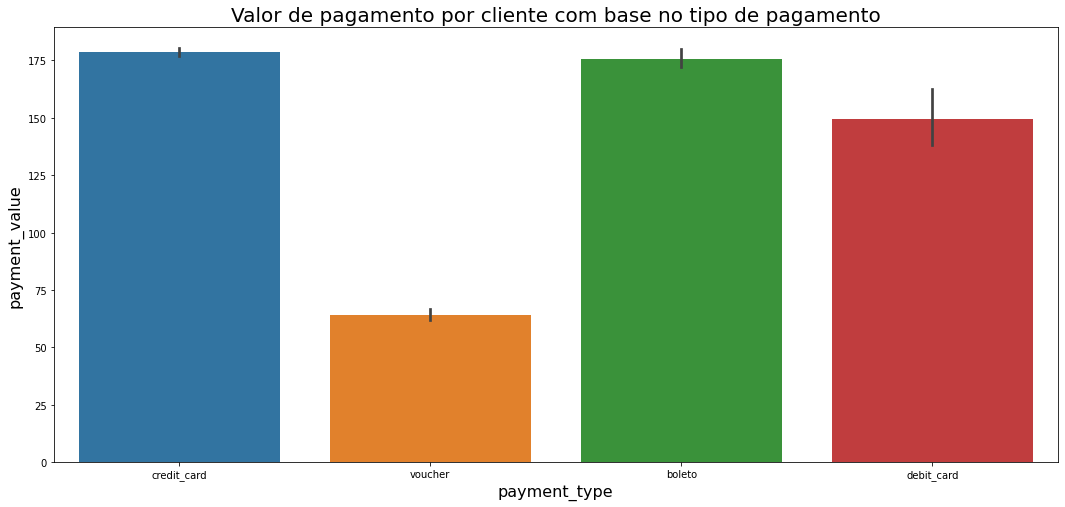

In [50]:
bar_plot_df('payment_type', 'payment_value', 'Valor de pagamento por cliente com base no tipo de pagamento')

estamos lidando com pedidos pagos majoritariamente por crédito, isso já sabiamos dado os graficos anteriores mas agora confirmamos que a media dos pagamentos por boleto e cartao de credito é de R$175,00, em seguida da media do pagamento por cartao de debito (R$ 150,00) e os pagamentos por voucher tem a menor representatividade, até R$75

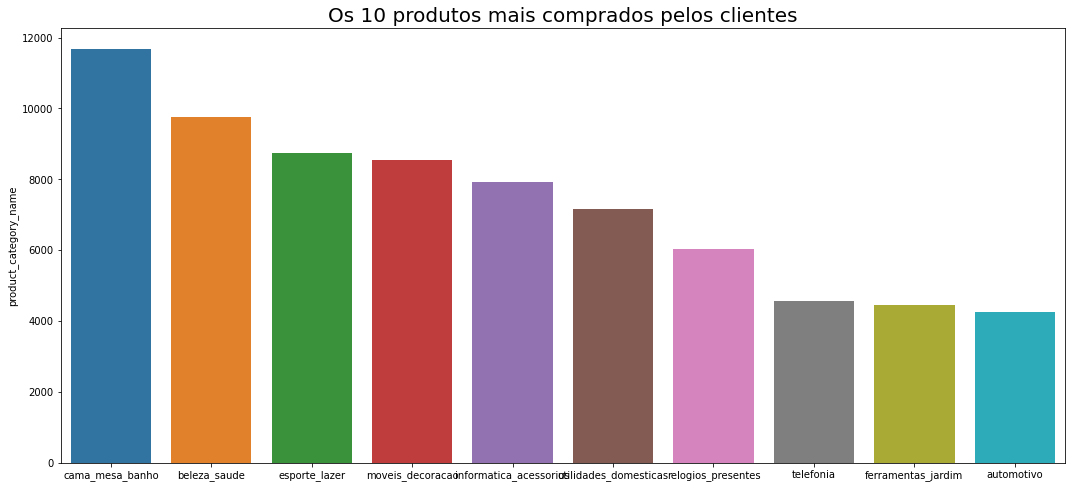

In [52]:
#10 categorias mais compradas pelos clientes (70 categorias no total)
fig = plt.figure(figsize = fig_size)
sns.barplot(x= df_ecommerce['product_category_name'].value_counts().index[:10],  #value counts contagem distinta, index limita 10 categorias
            y = df_ecommerce['product_category_name'].value_counts()[:10])

plt.title('Os 10 produtos mais comprados pelos clientes', fontsize = title_font_size) #configurando o titlo
plt.show()

esse grafico revela as categorias mais relevantes do ecommerce analisado: segmento doméstico. Se destacam as categorias de cama mesa e banho, beleza e saude, esporte e lazer e moveis decorativos respectivamente. Vale analisar os itens da categoria esporte e lazer e verificar se eles estão proximos do segmento para o lar, que aparenta ser o carro chefe desse e-commerce etc.

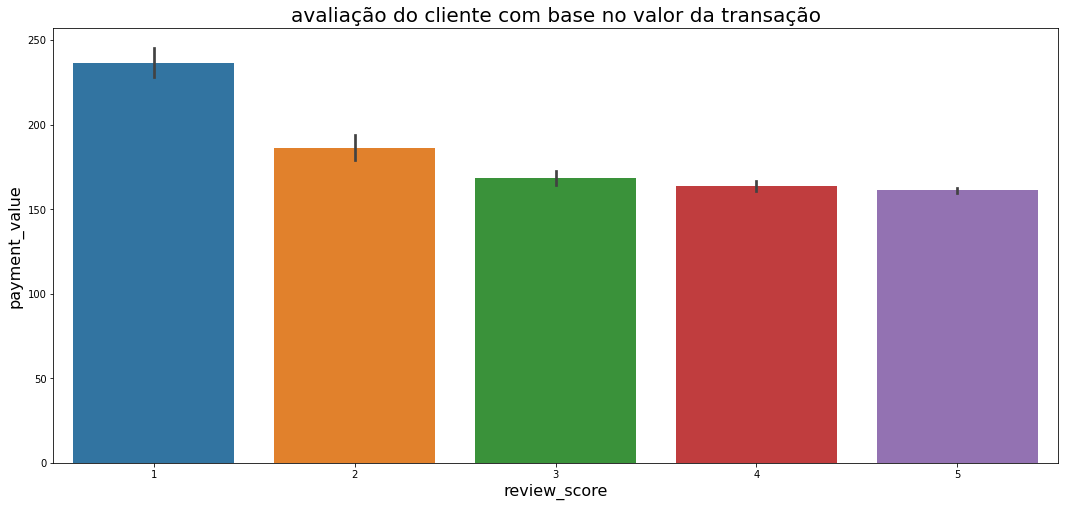

In [ ]:
#qual é a avaliação do cliente com base no valor da transação?
bar_plot_df('review_score','payment_value','avaliação do cliente com base no valor da transação')

In [59]:
#para apoiar a analise dessas avaliações, vamos verificar o resumo estatistico dessa coluna payment_value
df_ecommerce['payment_value'].describe()

count    113209.000000
mean        171.570520
std         264.235129
min           0.000000
25%          60.850000
50%         107.980000
75%         189.150000
max       13664.080000
Name: payment_value, dtype: float64

ressalto que para analise de valor, estou considerando o payment_value (valor da transação) pois ele considera o valor pago de fato no pedido, após aplicação de descontos sobre o custo do item por exemplo, ou outras modificações operacionais no percuso da entrega.

R$171,00 é a media dos pagamentos, com uma mediana de 107,00. Essa variação pode ate ser esperada devido a diversidade de categorias, variação de preço, entre muitos indicadores que envolve preço como sensibilidade, por exemplo. No entanto, é interessante observar que 75% dos pagamentos corresponderam a R$189,00, até maior que a média...

agora olhando para o gráfico, a relação entre média do valor da transação e avaliação se mostra bastante linear, sem grandes diferenças entre as avaliações.


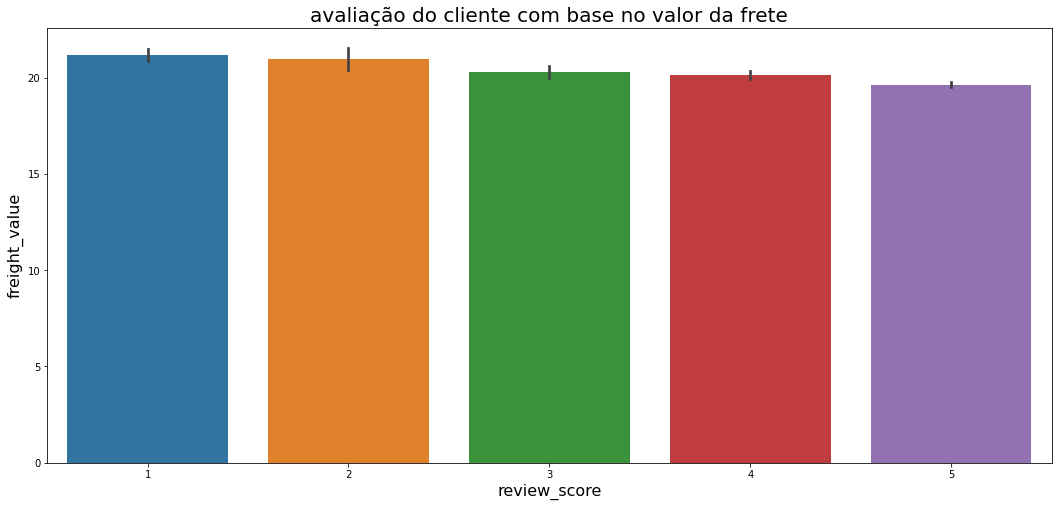

In [ ]:
#e a avaliação do cliente com base no valor do frete?
bar_plot_df('review_score','freight_value','avaliação do cliente com base no valor da frete')

agora comparando a avaliação e o valor pago no frete também não vemos diferença visível entre essas variáveis, em todas as avaliações a media do valor pago no frente foi de aprox R$20,00. Geolocalização explica? multiplos centros de distribuição espalhados? operação, etc.

In [62]:
#apenas para ter uma ideia do resumo estatistico do preço pago no frete
df_ecommerce['freight_value'].describe()

#de todo o dataset a média do frente representa R$20,00 como vimos no gráfico, mas é interessante observar e confirmar que 75% dos fretes custam aprox R$21,00

count    113209.000000
mean         20.002512
std          15.710847
min           0.000000
25%          13.080000
50%          16.320000
75%          21.190000
max         409.680000
Name: freight_value, dtype: float64

<AxesSubplot:>

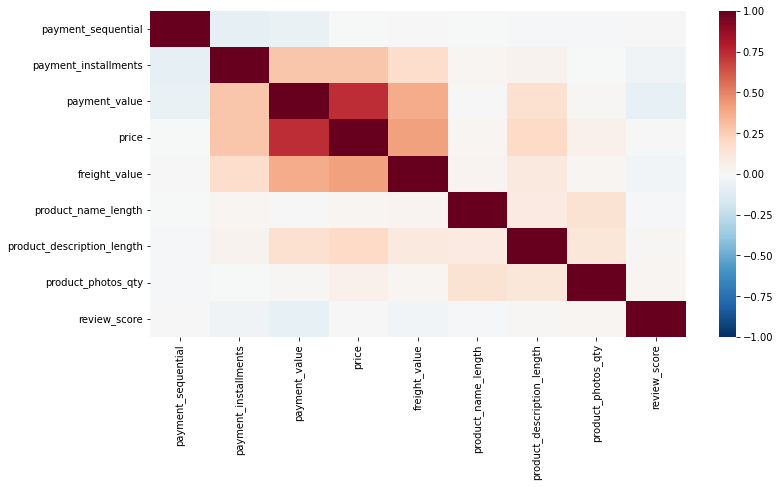

In [ ]:
#agora vamos verificar de uma forma mais abrangente a correlacao entre as colunas dos dados
plt.figure(figsize=(12,6))
sns.heatmap(df_ecommerce.corr(), cmap='RdBu_r', vmin=-1, vmax=1) #RdBu_r red e blue

Com a correlação conseguimos ver rapidamente quanto uma variavel influencia sobre outra e com um gráfico de uma forma bastante rápida. 
A correlação pode ser positiva ou negativa (1 ou -1), no caso da positiva quanto maior uma variavel maior a segunda variavel em comparação.
Em estatistica a correlação é resumidamente a variância sobre o desvio padrão
No grafico, em vermelho mostra a correlação positiva e azul negativa.
Fica bastante evidente a correlação positiva entre preço e valor da transação por exemplo, obviamente ao aumentar o custo do item o valor da transação aumentará.
Além disso, seguindo a analise que estava fazendo acima, conseguimos ver que não há correlação entre valor da transação e avaliação do pedido ou valor do frete e o mesmo.


In [ ]:
#o dataset com as correlações
df_ecommerce.corr()

,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_length,product_description_length,product_photos_qty,review_score
payment_sequential,1.000000,-0.087989,-0.065722,-0.000090,0.007141,-0.002185,-0.010642,-0.008289,0.005481
payment_installments,-0.087989,1.000000,0.274616,0.279856,0.186215,0.020852,0.036227,-0.001525,-0.043281
payment_value,-0.065722,0.274616,1.000000,0.738738,0.372798,0.005470,0.157132,0.010169,-0.081249
price,-0.000090,0.279856,0.738738,1.000000,0.412718,0.019767,0.200886,0.052912,0.003271
freight_value,0.007141,0.186215,0.372798,0.412718,1.000000,0.025092,0.095269,0.022377,-0.033639
product_name_length,-0.002185,0.020852,0.005470,0.019767,0.025092,1.000000,0.090189,0.144894,-0.013726
product_description_length,-0.010642,0.036227,0.157132,0.200886,0.095269,0.090189,1.000000,0.118754,0.014174
product_photos_qty,-0.008289,-0.001525,0.010169,0.052912,0.022377,0.144894,0.118754,1.000000,0.021166
review_score,0.005481,-0.043281,-0.081249,0.003271,-0.033639,-0.013726,0.014174,0.021166,1.000000


In [ ]:
#correlacao entre valor da transacao e preço do produto
def scatter_plot_df(x_var, y_var, title):
  # definição do gráfico de dispersao
  fig = plt.figure(figsize = fig_size)
  sns.scatterplot(x = x_var,hue='review_score' #o hue é muito util pra diferenciar os pontos do grafico por determinada coluna, nesse caso a avaliacao
              ,y = y_var, data=df_ecommerce)
  plt.title(title, fontsize = title_font_size)
  plt.xlabel(x_var, fontsize = font_size)
  plt.ylabel(y_var, fontsize = font_size)
  plt.show()

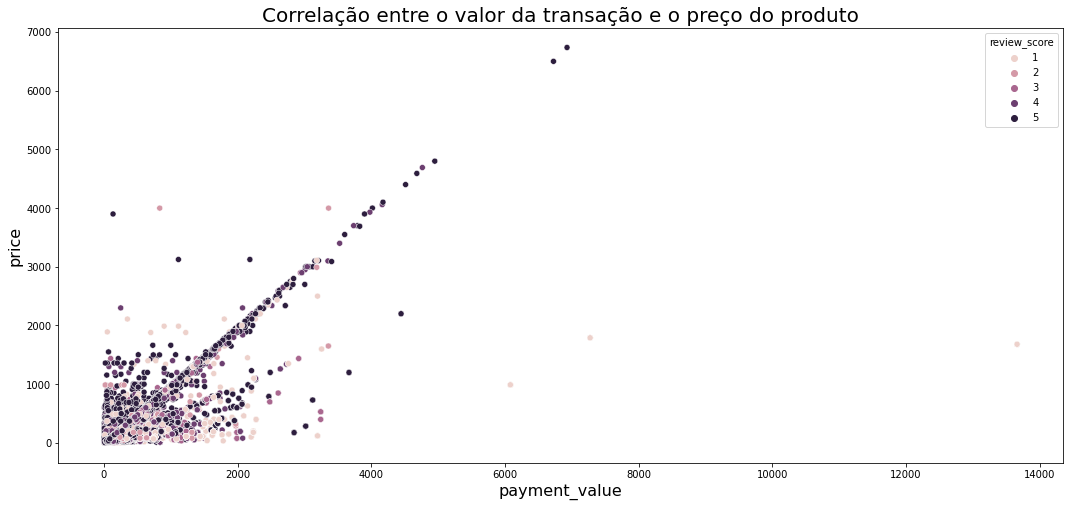

In [ ]:
scatter_plot_df('payment_value','price','Correlação entre o valor da transação e o preço do produto')

com esse grafico fica mais facil ver os outliers ao plotar duas variaveis numericas. Exemplo, existem alguns itens fora da curva que mesmo custando mais de R$400,00 tiveram ótimas avaliações, de score 5, outro ponto é que a maioria dos pontos mais claros, ou seja com score 1 representando baixas avaliações, estão concentrados nos preços mais baixos.

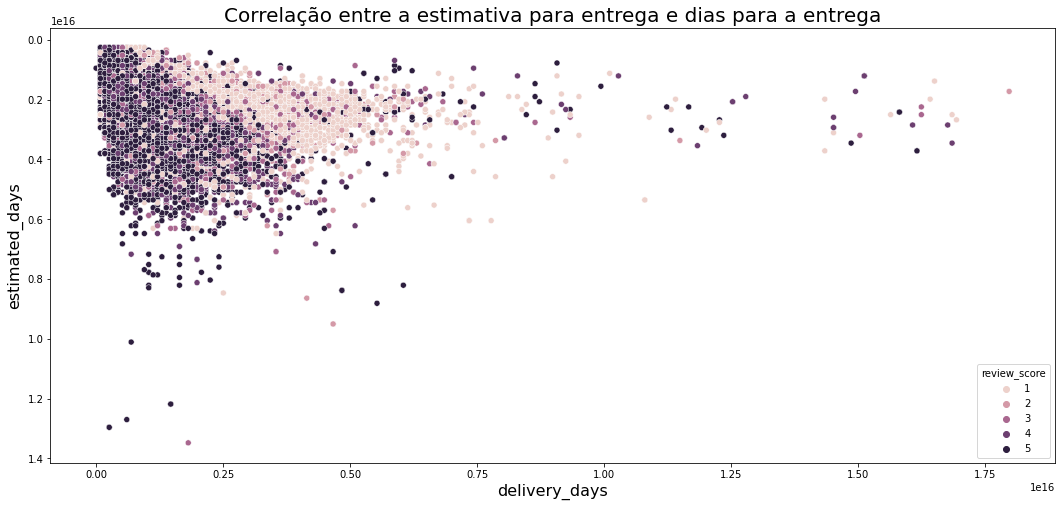

In [ ]:
scatter_plot_df('delivery_days','estimated_days','Correlação entre a estimativa para entrega e dias para a entrega')

No x estão os dias para entrega e no y os dias estimados para entrega. Ao plotar essas duas variáveis mais operacionais, facilita a visualização de que os pedidos com alta avaliação foram entregues até antes que a estimativa de entrega. O atraso na entrega é muito importante para a definição de satisfação do cliente e com certeza será explorado no modelo para prever a satisfação do consumidor